# Worldwide data

Read the worldwide data, and then see if we can predict anything about them!

Note, cells 3 & 4 get a list of all the samples.

These lines in cell 4 are key:

```
# so far, PRJEB20836 has the best
sample_id = worldwide_samples[3]
print(f"Sample is {sample_id}", file=sys.stderr)
wwdf, wwmd = cf_analysis_lib.read_worldwide_data(sample_id)
wwdf
```

You just change the index of the `worldwide_sample_number` to reflect the one you are interested in, and restart the kernel and run all cells.


In [1]:
worldwide_sample_number = 21

In [2]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib


# Read our data and models

This is our normal models we use for predicting everything

In [3]:
sequence_type = "MGI"
datadir = '..'

sslevel='subsystems'
ss_normalisation='norm_ss'
taxa = "family"
all_taxa = True

our_df, our_metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, all_taxa=all_taxa, sslevel=f"{sslevel}_{ss_normalisation}.tsv.gz", taxa=taxa)

encoder_models = 'cluster_gbrfs_eukaryotes'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['Cluster'] = cluster_assignments['Cluster'].astype(int)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)
pc_df.shape

Using ../MGI/FunctionalAnalysis/subsystems/MGI_subsystems_norm_ss.tsv.gz for the subsystems


(127, 300)

# Read one of the data sets

Samples: 
['PRJNA1081394', 'PRJNA516442', 'PRJEB51171', 'PRJNA71831', 'PRJEB20836', 'PRJNA516870', 'PRJNA1126024', 'PRJEB14440', 'PRJEB32062', 'PRJEB54014', 'PRJNA1055940', 'PRJNA1091195', 'PRJNA1101448', 'PRJNA316056', 'PRJNA316588', 'PRJNA510441', 'PRJNA615628', 'PRJNA644285', 'PRJNA825831', 'PRJNA839435', 'PRJNA846291', 'PRJNA931830']

Initially, lets see what's there?

In [4]:
worldwide_samples = cf_analysis_lib.worldwide_samples()
print(f"There are {len(worldwide_samples)}")
print(worldwide_samples)

There are 24
['PRJNA1081394', 'PRJNA516442', 'PRJEB51171', 'PRJNA71831', 'PRJEB20836', 'PRJNA516870', 'PRJNA1126024', 'PRJEB14440', 'PRJEB32062', 'PRJEB54014', 'PRJNA1055940', 'PRJNA1091195', 'PRJNA1101448', 'PRJNA316056', 'PRJNA316588', 'PRJNA510441', 'PRJNA615628', 'PRJNA644285', 'PRJNA825831', 'PRJNA839435', 'PRJNA846291', 'PRJNA931830', 'not_analysed', 'papers']


In [5]:
# find one sample
worldwide_samples.index('PRJNA931830')

21

### Read the ww data

In [6]:
sample_id = worldwide_samples[worldwide_sample_number]
cf_analysis_lib.show_green(title="Analysis Report", message=f"Analysing: {sample_id}")
os.makedirs(os.path.join("img", "worldwide", sample_id, "img"), exist_ok=True)
print(f"Sample is {sample_id}", file=sys.stderr)

wwdf, wwmd = cf_analysis_lib.read_worldwide_data(sample_id, sslevel=sslevel, ss_normalisation=ss_normalisation,
                        taxonomy=taxa, all_taxa=all_taxa, raw_taxa=False, drop_amplicon=True,
                        drop_suspected_amplicon=True, verbose=True)


# now we add any columns from our_df that are not in wwdf. This make subsequent computations easier (and correct!)
missing = [c for c in our_df.columns if c not in wwdf.columns]
missing_df = pd.DataFrame(0, index=wwdf.index, columns=missing)
wwdf = pd.concat([wwdf, missing_df], axis=1).copy()

print(f"We added {len(missing)} columns to ww df that were missing", file=sys.stderr)
wwdf

Sample is PRJNA931830
Reading subsystems from ../WorldWideDataAnalysis/Atavide/PRJNA931830/subsystems/PRJNA931830_subsystems_norm_ss.tsv.gz
Before dropping suspects, shape is (798, 260) and after is (798, 260)
Read 260 samples and 798 subsystems
Reading taxonomy from ../WorldWideDataAnalysis/Atavide/PRJNA931830/taxonomy_summary/PRJNA931830_family.norm.tsv.gz
Read 260 samples and 2680 family
Read 260 samples and 7 metadata columns
We added 62 columns to ww df that were missing


,"2,3-diacetamido-2,3-dideoxy-d-mannuronic acid",2-O-alpha-mannosyl-D-glycerate utilization,2-aminophenol Metabolism,2-ketoacid oxidoreductases disambiguation,2-oxoglutarate dehydrogenase,2-phosphoglycolate salvage,3-amino-5-hydroxybenzoic Acid Synthesis,4-hydroxybenzoyl-CoA reductase,5-methylaminomethyl-2-thiouridine,A Hypothetical Protein Related to Proline Metabolism,...,Haemonchidae,Euplectellidae,Gelidiaceae,Dixoniellaceae,Cymodoceaceae,Pittosporaceae,Goodeniaceae,Gentianaceae,Annonaceae,Stemonaceae
SRR23346028,123.629725,1142.103174,447.421862,867.370452,730.985279,365.002045,597.543671,0.000000,5127.690022,678.982299,...,0,0,0,0,0,0,0,0,0,0
SRR23346029,91.547371,1451.601429,175.785571,144.142950,675.964348,339.511009,456.625252,0.000000,3641.155070,510.271525,...,0,0,0,0,0,0,0,0,0,0
SRR23346030,438.233514,490.361750,587.721432,331.831375,1730.038632,696.058504,631.832150,0.000000,5432.716221,318.440108,...,0,0,0,0,0,0,0,0,0,0
SRR23346031,58.807331,152.097565,598.511376,1233.027874,32.072207,312.955653,1123.350494,0.000000,3831.143825,768.502773,...,0,0,0,0,0,0,0,0,0,0
SRR23346032,164.967174,239.046035,321.725081,80.431270,1217.359361,500.081178,693.324715,0.000000,5336.023511,442.453427,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR23346283,250.318401,503.277292,539.716047,977.289160,597.203903,394.159065,713.482258,0.000000,5308.968120,580.599625,...,0,0,0,0,0,0,0,0,0,0
SRR23346284,70.461740,61.654023,2312.319447,1912.155480,877.865208,996.740036,786.675972,0.000000,2889.812128,618.399635,...,0,0,0,0,0,0,0,0,0,0
SRR23346285,108.775547,1087.151725,346.552253,116.490125,374.982149,400.688464,261.742209,0.000000,5415.331763,888.316867,...,0,0,0,0,0,0,0,0,0,0
SRR23346286,147.166900,601.694821,614.314943,1294.512347,441.799240,333.517241,798.528005,0.000000,4961.132570,657.874717,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# print run counts
run_counts = {"PRJEB14440": "- The entire data set is 5 runs, and 1,330,576,074 bp", "PRJEB20836": "- The entire data set is 1396 runs, and 1,007,979,034,098 bp", "PRJEB32062": "- The entire data set is 27 runs, and 113,773,728,053 bp", "PRJEB51171": "- The entire data set is 64 runs, and 29,874,922,519 bp", "PRJEB54014": "- The entire data set is 80 runs, and 447,488,092,200 bp", "PRJNA1055940": "- The entire data set is 61 runs, and 386,942,064,540 bp", "PRJNA1081394": "- The entire data set is 549 runs, and 510,156,291,748 bp", "PRJNA1091195": "- The entire data set is 44 runs, and 146,735,286,366 bp", "PRJNA1101448": "- The entire data set is 323 runs, and 89,493,823,284 bp", "PRJNA1126024": "- The entire data set is 2 runs, and 1,071,033,642 bp", "PRJNA316056": "- The entire data set is 12 runs, and 36,012,000,000 bp", "PRJNA316588": "- The entire data set is 18 runs, and 121,257,187,412 bp", "PRJNA510441": "- The entire data set is 14 runs, and 906,511,907 bp", "PRJNA516442": "- The entire data set is 93 runs, and 34,371,719,753 bp", "PRJNA516870": "- The entire data set is 79 runs, and 39,170,766,613 bp", "PRJNA615628": "- The entire data set is 71 runs, and 95,889,827,074 bp", "PRJNA644285": "- The entire data set is 12 runs, and 29,679,938,510 bp", "PRJNA71831": "- The entire data set is 38 runs, and 1,179,409,307 bp", "PRJNA825831": "- The entire data set is 117 runs, and 58,764,823,681 bp", "PRJNA839435": "- The entire data set is 12 runs, and 8,336,976,960 bp", "PRJNA846291": "- The entire data set is 98 runs, and 87,154,850,753 bp", "PRJNA931830": "- The entire data set is 260 runs, and 740,690,138,100 bp"}
cf_analysis_lib.show_green(title="Analysis Report", message=f"{run_counts[sample_id]} (including amplicon sequences)")

In [8]:
cf_analysis_lib.show_green(title="Analysis Report", message=f"- We analysed {len(wwdf.index)} metagenomic sequence runs.")

## Create the PCA

Now we need to create the PCA df using our original data, and use those axis to fit our new data. We need the cluster assignments and the raw data!

In [9]:
grouped = cluster_assignments.groupby("Cluster")

# pc_df = pd.DataFrame(index=our_df.index, columns=[f"Cluster {x+1}" for x in range(len(cluster_assignments.groupby("Cluster").size()))])
# ww_pc_df = pd.DataFrame(index=wwdf.index, columns=[f"Cluster {x+1}" for x in range(len(cluster_assignments.groupby("Cluster").size()))])
fit_pca = {}
pc_df_data = {}
ww_pc_data = {}
for cluster_id, group in grouped:
    df_clust = our_df[cluster_assignments.loc[cluster_assignments["Cluster"] == cluster_id, "Feature"]]
    ww_clust = wwdf[cluster_assignments.loc[cluster_assignments["Cluster"] == cluster_id, "Feature"]]
    pca = PCA(n_components=1)
    pca.fit(df_clust)
    fit_pca[cluster_id] = pca
    pc_df_data[f"Cluster {cluster_id}"] = pca.transform(df_clust)[:,0]
    ww_pc_data[f"Cluster {cluster_id}"] = pca.transform(ww_clust)[:,0]

pc_df = pd.DataFrame(pc_df_data, index=our_df.index)
ww_pc_df = pd.DataFrame(ww_pc_data, index=wwdf.index)

In [10]:
ww_pc_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 291,Cluster 292,Cluster 293,Cluster 294,Cluster 295,Cluster 296,Cluster 297,Cluster 298,Cluster 299,Cluster 300
SRR23346028,1948.696572,-608.675249,-723.523704,-1676.128682,-211.977335,-2586.982544,-503.384658,-1105.184780,453.674398,-2237.793297,...,54602.100322,22.642063,12174.125515,-199.253540,276.856072,28.790503,-224.269423,226.018951,-787.124407,-1387.450713
SRR23346029,-1023.051167,-899.248209,-2817.784277,-5318.505313,-859.817132,-3118.050535,-880.933176,-2751.876079,-1611.128880,-3975.475078,...,-9342.095074,-3.067763,-4922.411528,1748.564706,568.578265,-6.564201,-316.363305,431.330220,-2738.845632,-1615.093707
SRR23346030,-6.585049,-571.934314,-3023.165749,-167.866451,-145.280071,-2806.636237,-1419.836993,-2878.769315,66.546241,-5227.410986,...,20582.582353,3.818588,-5104.958379,-442.507318,-250.540481,-1.726984,-406.053156,170.817922,33453.496300,-1586.183326
SRR23346031,783.237002,-101.644827,-2005.861803,2707.928103,77.812644,-3505.128452,-1311.911094,-2074.334857,-1061.186643,-5574.688878,...,-16690.357059,0.048949,-3477.080211,-431.472124,-275.934540,1.687554,627.542692,-194.892863,4919.395831,-710.225037
SRR23346032,421.611336,-394.158336,-1093.955827,-523.759104,-5.358807,-1543.660394,-263.754700,-1512.440235,-2273.459802,-5882.492018,...,-16350.506013,-3.375002,-3857.943952,-172.800127,63.327039,-0.557190,-397.851558,-176.118274,-1988.310575,-1531.935873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR23346283,1886.589289,-165.378935,-2259.788600,-746.813359,-54.512492,-3108.110710,-869.457078,-1797.659012,-720.622925,-2346.559808,...,22129.701848,7.230416,-4821.299186,-396.331936,-164.745937,-2.122351,83.625957,-90.169736,17245.886205,-1421.499819
SRR23346284,-3485.548718,-981.799979,-3628.088690,-610.560176,-1132.601584,-4315.660188,-2354.192163,-3343.220892,-3395.707566,-5304.250104,...,-17804.280405,-1.892591,-5619.572442,3046.450037,-423.023229,15.032038,-413.257679,-161.004747,-4329.601589,-1601.251012
SRR23346285,2975.352926,-158.922386,1311.946067,-785.853264,997.717222,1658.477973,-230.219230,1028.954710,1960.817530,-2362.866591,...,-11231.069965,-3.807564,-1220.596680,-594.163514,1396.546316,0.284872,-196.603309,-46.281701,-2006.687509,-1619.398422
SRR23346286,1827.957987,-120.873022,-2180.904578,1535.367493,-127.945499,-3183.361860,-609.667105,-2327.024402,-912.411509,-333.647321,...,28912.541771,5.419227,-5002.548689,-527.683338,58.443379,-2.568005,35.500805,-98.669266,29366.310347,-1434.215555


In [11]:
print(f"Our data: min: {min(pc_df['Cluster 56']):.2f} max: {max(pc_df['Cluster 56']):.2f}")
print(f"Sample {sample_id}: min: {min(ww_pc_df['Cluster 56']):.2f} max: {max(ww_pc_df['Cluster 56']):.2f}")

Our data: min: -22023.06 max: 481754.57
Sample PRJNA931830: min: -22230.31 max: 446706.53


# Scale the data frames. 

We use a robust scaler since all the PCAs have different units. This normalises all the data.

In [12]:
# scaler = StandardScaler() # - not good because too many values at 0
scaler = RobustScaler() 
# scaler = MinMaxScaler() 

# train the scaler on pc_df and then apply the _same scalar_ to ww_pc_df

trained_scaler = scaler.fit(pc_df)

pc_scaled = pd.DataFrame(
    trained_scaler.transform(pc_df),
    index=pc_df.index,
    columns=pc_df.columns
)

ww_pc_scaled = pd.DataFrame(
    trained_scaler.transform(ww_pc_df),
    index=ww_pc_df.index,
    columns=ww_pc_df.columns
)

In [13]:
print(f"Our data: min: {min(pc_scaled['Cluster 56']):.2f} max: {max(pc_scaled['Cluster 56']):.2f}")
print(f"Sample {sample_id}: min: {min(ww_pc_scaled['Cluster 56']):.2f} max: {max(ww_pc_scaled['Cluster 56']):.2f}")

Our data: min: -0.58 max: 114.95
Sample PRJNA931830: min: -0.63 max: 106.91


# Build the GBRF with our data first

This is from our separate model analyses

In [14]:
#intcol = 'Pseudomonas Culture' # note these two columns have the same information, but 'CS_Pseudomonas aeruginosa' is a category, while 'Pseudomonas culture' is a float!
intcol = 'CS_Pseudomonas aeruginosa'

intcol_title = replace_index.sub('', intcol).replace('_', ' ')
merged_df = pc_scaled.join(our_metadata[[intcol]]).dropna(subset=intcol)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(our_metadata, intcol, merged_df)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y, n_estimators=1000, n_iter_no_change=20)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'

print(f"We used {model.n_estimators_} estimators for the random forest {met}", file=sys.stderr)

We used 441 estimators for the random forest classifier


## Apply our model to the new data

We use the model from the GBRF to predict the outcomes based on the clustered data.


In [15]:
predictions = model.predict(ww_pc_scaled)
perc = predictions.sum()/len(predictions) * 100
cf_analysis_lib.show_green(title="Analysis Report", message=f"- We predicted {predictions.sum()} samples out of {len(predictions)} ({perc:0.1f}%) have _Pseudomonas aeruginosa_")
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
# how confident are we in our predictions?
def confidence_label(prob, threshold_low=0.6, threshold_high=0.8):
    if prob < threshold_low:
        return "Low"
    elif prob < threshold_high:
        return "Medium"
    else:
        return "High"

In [17]:
probs = model.predict_proba(ww_pc_scaled)
print(probs[:10])

[[0.78785622 0.21214378]
 [0.66980585 0.33019415]
 [0.73713312 0.26286688]
 [0.82054396 0.17945604]
 [0.80042818 0.19957182]
 [0.80221486 0.19778514]
 [0.61667948 0.38332052]
 [0.69639557 0.30360443]
 [0.7443665  0.2556335 ]
 [0.7612598  0.2387402 ]]


In [18]:
pred_class = np.argmax(probs, axis=1)
pred_conf = probs[np.arange(len(probs)), pred_class]
label_map = {0: "Negative", 1: "Positive"}

# Confidence labels
confidence = [confidence_label(p) for p in pred_conf]

output = ["Sample | Pseudomonas Prediction | Confidence | Certainty\n --- | --- | --- | ---"]

for i, (cls, conf, label) in enumerate(zip(pred_class, pred_conf, confidence)):
    output.append(f"{ww_pc_scaled.index[i]} | {label_map[cls]} | {conf:.2f} | {label}")
cf_analysis_lib.show_green(title="Analysis Report", message="\n".join(output))

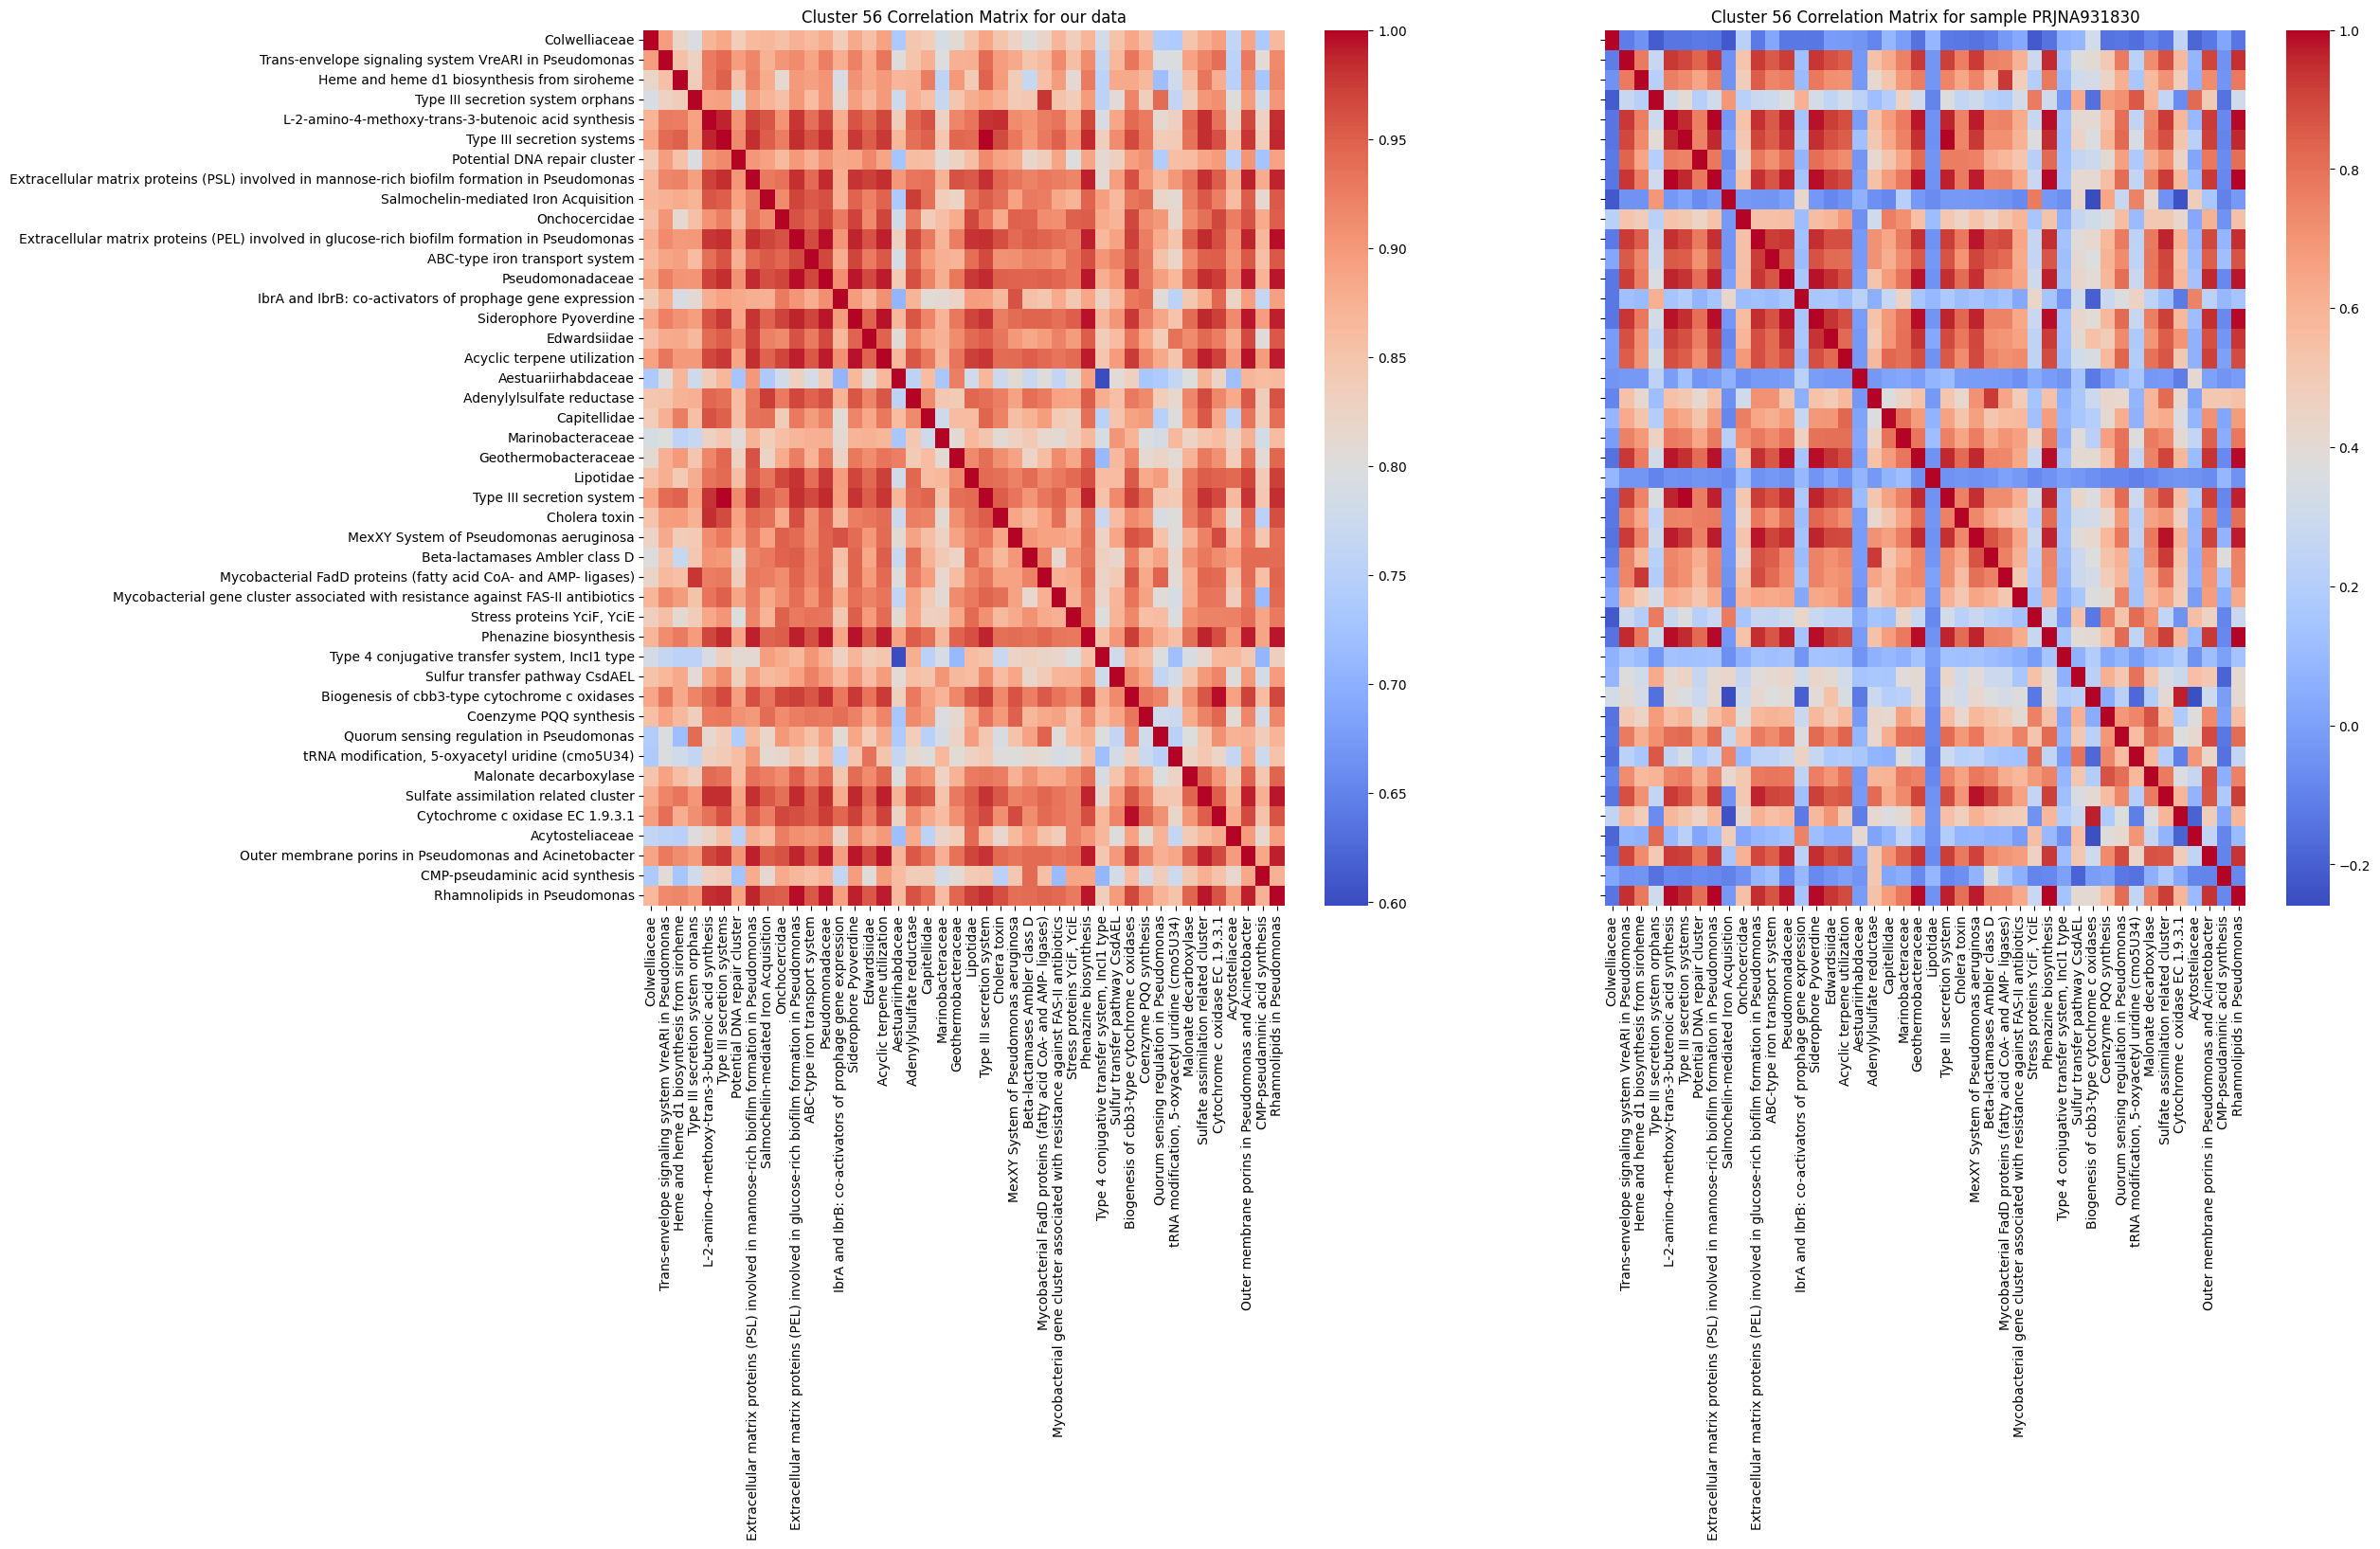

In [19]:
interesting_cluster = 56
fig, axes = plt.subplots(figsize=(24, 12), nrows=1, ncols=2, sharex=False, sharey=True)

df_clust = our_df[cluster_assignments.loc[cluster_assignments["Cluster"] == interesting_cluster, "Feature"]]
df_clust_corr = df_clust.corr()
g = sns.heatmap(df_clust_corr, ax=axes[0], annot=False, cmap='coolwarm')
g.set_title(f'Cluster {interesting_cluster} Correlation Matrix for our data')

valid_features = [f for f in cluster_assignments.loc[cluster_assignments["Cluster"] == interesting_cluster, "Feature"] if f in wwdf.columns]
df_clust = wwdf[valid_features]
df_clust_corr = df_clust.corr()

sns.heatmap(df_clust_corr, ax=axes[1], annot=False, cmap='coolwarm')
plt.title(f'Cluster {interesting_cluster} Correlation Matrix for sample {sample_id}')

plt.show()

# Plot a t-SNE of our data and the worldwide data

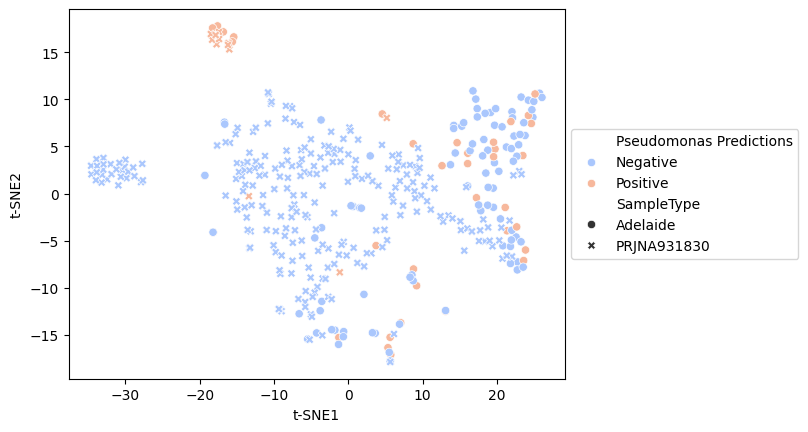

In [20]:
X_combined = np.vstack([pc_df, ww_pc_df])
sample_labels = (["Adelaide"] * len(our_df)) + ([sample_id] * len(wwdf))
group_labels = list(our_metadata[intcol]) + list(predictions)
sample_ids = list(pc_df.index) + list(ww_pc_df.index)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_combined)

df_tsne = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
df_tsne["SampleType"] = sample_labels  # Or use group_labels
df_tsne["Pseudomonas Predictions"] = group_labels  # Or use group_labels
df_tsne['Pseudomonas Predictions'] = df_tsne['Pseudomonas Predictions'].map({0: 'Negative', 1: 'Positive'})
df_tsne['Sample IDs'] = sample_ids

# Basic comparison: New vs Original
g = sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", palette='coolwarm', style="SampleType", hue="Pseudomonas Predictions")
g.set_xlabel("t-SNE1")
g.set_ylabel("t-SNE2")
#plt.title(f"t-SNE of Adelaide and {sample_id} Samples")
plt.title("")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

imgout = os.path.join("img", "worldwide", sample_id, "img", f"{sample_id}_Pseudomonas_tSNE.png")
plt.savefig(imgout)
cf_analysis_lib.show_green(title="Analysis Report", message=f"## t-SNE\n![Comparison of Adelaide and {sample_id} samples by t-SNE](img/{sample_id}_Pseudomonas_tSNE.png 'Fig. t-SNE of all the analysed sequence data coloured by whether Pseudomonas is predicted')")

plt.show()

# Create a PCA of all the data

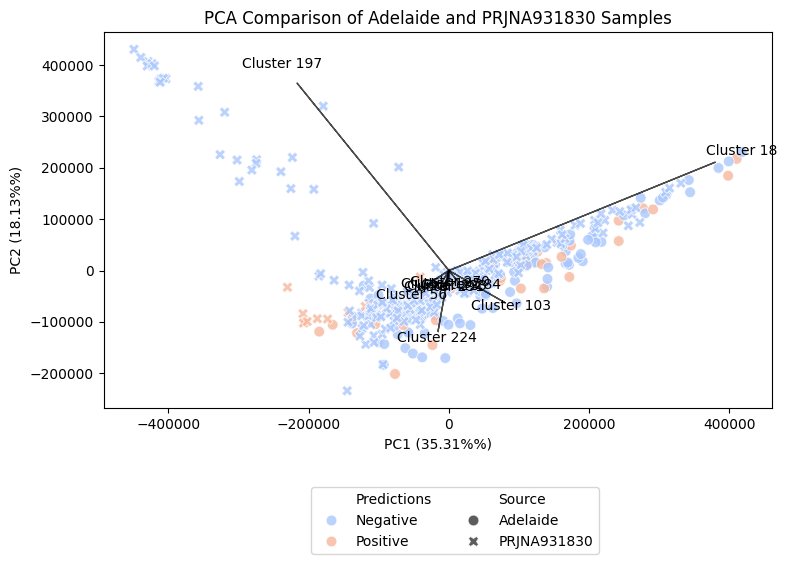

In [21]:
pca_model = PCA(n_components=2)
pca_combined_result = pca_model.fit_transform(X_combined)

# Put into DataFrame for plotting
pca_combined_df = pd.DataFrame(pca_combined_result, columns=["PC1", "PC2"])
pca_combined_df["Source"] = (["Adelaide"] * len(our_df)) + ([sample_id] * len(wwdf))
pca_combined_df["Predictions"] = list(our_metadata[intcol]) + list(predictions)
pca_combined_df["Predictions"] = pca_combined_df["Predictions"].map({0: 'Negative', 1: 'Positive'})

pca_combined_df['IDS'] = list(our_metadata.index) + list(wwdf.index)

custom_labels = {0.0: 'No', 1.0: 'Yes'}

# Get the loadings (contributions of each original variable to the PCs)
loadings = pd.DataFrame(pca_model.components_.T, 
                        index=pc_df.columns, 
                        columns=["PC1", "PC2"])

# Scale arrows for better visibility
arrow_scale = 450000

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=pca_combined_df, x="PC1", palette='coolwarm',
                y="PC2", style="Source", hue='Predictions', alpha=0.8, s=60)
plt.title(f"PCA Comparison of Adelaide and {sample_id} Samples")
plt.xlabel(f"PC1 ({pca_model.explained_variance_ratio_[0]:.2%}%)")
plt.ylabel(f"PC2 ({pca_model.explained_variance_ratio_[1]:.2%}%)")
# Plot top N most important loadings (e.g., based on magnitude of PC1^2 + PC2^2)
top_features = loadings.pow(2).sum(axis=1).sort_values(ascending=False).head(10).index

for feature in top_features:
    x = loadings.loc[feature, "PC1"]
    y = loadings.loc[feature, "PC2"]
    plt.arrow(0, 0, x * arrow_scale, y * arrow_scale,
              color='black', alpha=0.7, head_width=0.02)
    plt.text(x * arrow_scale * 1.1, y * arrow_scale * 1.1, feature,
             color='black', ha='center', va='center', fontsize=10)

plt.legend(loc='center left', ncol=2, bbox_to_anchor=(0.3, -0.3))

plt.tight_layout()
plt.show()


# Plot a PCA of just the "Pseudomonas" Cluster

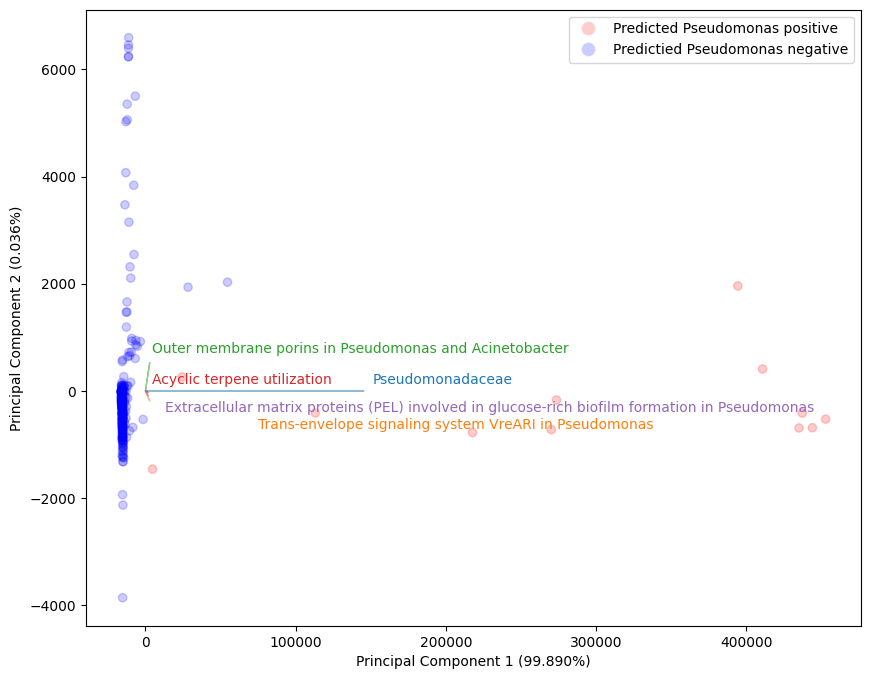

In [22]:
pca = PCA(n_components=2)

intcol = 'Pseudomonas Culture'
valid_features = [f for f in cluster_assignments.loc[cluster_assignments["Cluster"] == interesting_cluster, "Feature"] if f in wwdf.columns]
df_clust = wwdf[valid_features]

pca_result = pca.fit_transform(df_clust)
pca_df = pd.DataFrame(data=pca_result, index=wwdf.index, columns=['PC1', 'PC2'])

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=df_clust.columns, columns=['PC1', 'PC2'])

# Create a DataFrame for top loadings
top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
top_loadings_df.head()

explained_variance = pca.explained_variance_ratio_ * 100
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]


# don't forget to change the legend
intcol_neg = 0
colours = np.where(predictions == intcol_neg, 'blue', 'red')

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colours, alpha=0.2)
#plt.title(f"PCA of the 'Pseudomonas' cluster (#56) in {sample_id}")
plt.title("")
plt.xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
plt.ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 5
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
colour_cycle = cycle(mcolors.TABLEAU_COLORS)
found_pseudomonas = False
for i in range(maxloadings):
    c = next(colour_cycle)
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    plt.arrow(0, 0, xpos, ypos, 
              color=c, alpha=0.5, width=0.05)
    texts.append(plt.text(xpos, ypos, top_loadings_df.index[i], color=c))

adjust_text(texts)


# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Predicted Pseudomonas positive', 
                         markerfacecolor='red', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Predictied Pseudomonas negative', 
                        markerfacecolor='blue', alpha=0.2, markersize=10)


plt.legend(handles=[blue_patch, red_patch])

imgout = os.path.join("img", "worldwide", sample_id, "img", f"{sample_id}_Pseudomonas_PCA.png")
plt.savefig(imgout)
cf_analysis_lib.show_green(title="Analysis Report", message=f"## PCA\n![This cluster of features are most strongly associated with the presence of Pseudomonas](img/{sample_id}_Pseudomonas_PCA.png 'Fig. PCA of the cluster of features most strongly associated with Pseudomonas colonization in {sample_id}')")
# Show the plot
plt.show()

## Just compare cluster 56

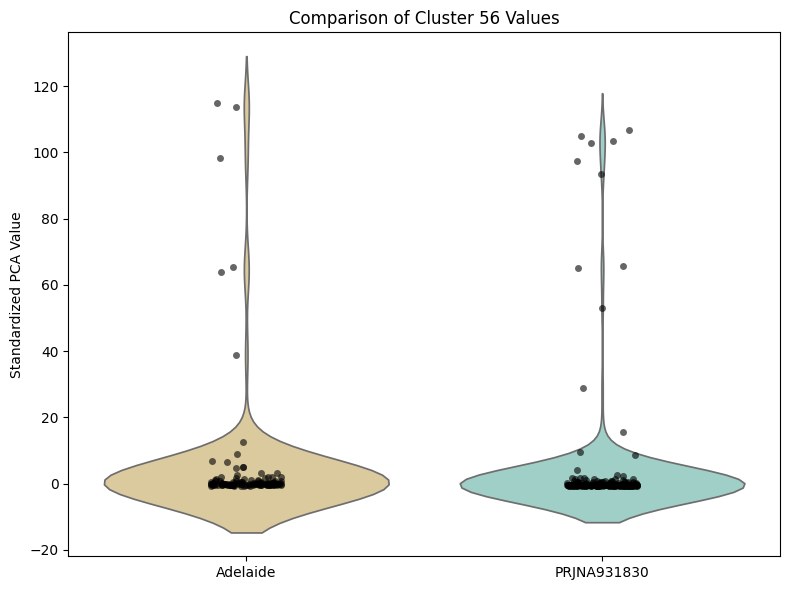

In [23]:
plot_df = pd.DataFrame({
    "Value": pd.concat([pc_scaled["Cluster 56"], ww_pc_scaled["Cluster 56"]], axis=0),
    "Dataset": (["Adelaide"] * len(pc_scaled)) + ([sample_id] * len(ww_pc_scaled))
})


plt.figure(figsize=(8, 6))

# Choose one:
# Boxplot + jitter
#sns.boxplot(data=plot_df, x="Dataset", y="Value", whis=1.5, palette="pastel")
#sns.stripplot(data=plot_df, x="Dataset", y="Value", jitter=True, color="k", alpha=0.6)

# Or Violin plot + jitter
sns.violinplot(data=plot_df, x="Dataset", palette='BrBG', y="Value", inner=None)
sns.stripplot(data=plot_df, x="Dataset", y="Value", jitter=True, color="k", alpha=0.6)

plt.title("Comparison of Cluster 56 Values")
plt.ylabel("Standardized PCA Value")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [24]:
for c in wwdf.columns:
    if "pseudom" in c.lower():
        print(c)

Extracellular matrix proteins (PEL) involved in glucose-rich biofilm formation in Pseudomonas
Extracellular matrix proteins (PSL) involved in mannose-rich biofilm formation in Pseudomonas
MexXY System of Pseudomonas aeruginosa
Outer membrane porins in Pseudomonas and Acinetobacter
Quorum sensing regulation in Pseudomonas
Rhamnolipids in Pseudomonas
Trans-envelope signaling system VreARI in Pseudomonas
Tripartite multidrug efflux systems (of RND type) in Pseudomonas
Pseudomonadaceae
Pseudomassariaceae
Pseudomuriellaceae


In [25]:
wwdf[['Pseudomonadaceae']]

,Pseudomonadaceae
SRR23346028,2637.644965
SRR23346029,3282.553641
SRR23346030,1077.109404
SRR23346031,195.312477
SRR23346032,993.832433
...,...
SRR23346283,418.415281
SRR23346284,5651.121071
SRR23346285,559.792776
SRR23346286,368.267962


In [26]:
ww_pc_df[['Cluster 56']]

,Cluster 56
SRR23346028,-19780.325512
SRR23346029,-19101.367091
SRR23346030,-21322.093745
SRR23346031,-22230.313216
SRR23346032,-21417.160671
...,...
SRR23346283,-21999.849920
SRR23346284,-16698.773170
SRR23346285,-21861.848782
SRR23346286,-22050.979850
